In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [198]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# define color palette
agro = ['#b2cb91','#9bc27e','#7fa465','#668f4f','#4e6f43','#59533e','#bf9000','#ffd966','#ffe599']

In [3]:
sns.set(style="whitegrid")  # Seaborn Grid Style

## read

In [327]:
df = pd.read_csv('Data/df_preprocessed.csv')
fert = pd.read_csv('Data/fert_preprocessed.csv')
# pest = pd.read_csv('Data/pest_preprocessed.csv')

In [328]:
df.shape

(143236, 8)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143236 entries, 0 to 143235
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Area                  143236 non-null  object 
 1   Crop                  143236 non-null  object 
 2   Year                  143236 non-null  int64  
 3   area_harvested_ha     143236 non-null  float64
 4   production_tonnes     143236 non-null  float64
 5   yield_hg/ha           143236 non-null  float64
 6   avg_rainfall_mm_year  143236 non-null  float64
 7   avg_temp_ºC           143236 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 8.7+ MB


In [330]:
# convert year to object type, because it's discrete.
df['Year'] = df['Year'].astype(object)

In [331]:
df.head(2)

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
0,Afghanistan,Wheat,1990,1570000.0,1650000.0,10510.0,327.0,14.38
1,Afghanistan,Wheat,1991,1690000.0,1726000.0,10213.0,327.0,14.38


In [332]:
df_corr = df.copy()

In [333]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143236 entries, 0 to 143235
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Area                  143236 non-null  object 
 1   Crop                  143236 non-null  object 
 2   Year                  143236 non-null  object 
 3   area_harvested_ha     143236 non-null  float64
 4   production_tonnes     143236 non-null  float64
 5   yield_hg/ha           143236 non-null  float64
 6   avg_rainfall_mm_year  143236 non-null  float64
 7   avg_temp_ºC           143236 non-null  float64
dtypes: float64(5), object(3)
memory usage: 8.7+ MB


In [334]:
# encode the object type variables to analize the correlation

from sklearn.preprocessing import LabelEncoder

# create an instance of the encoder
encoder = LabelEncoder()

for columns in df_corr.columns:
    if df_corr[columns].dtype == 'object':
        df_corr[columns] = encoder.fit_transform(df_corr[columns])

In [ ]:
# También podemos invertir la transformación para obtener las etiquetas originales
# original_labels = encoder.inverse_transform(encoded_labels)

<Axes: >

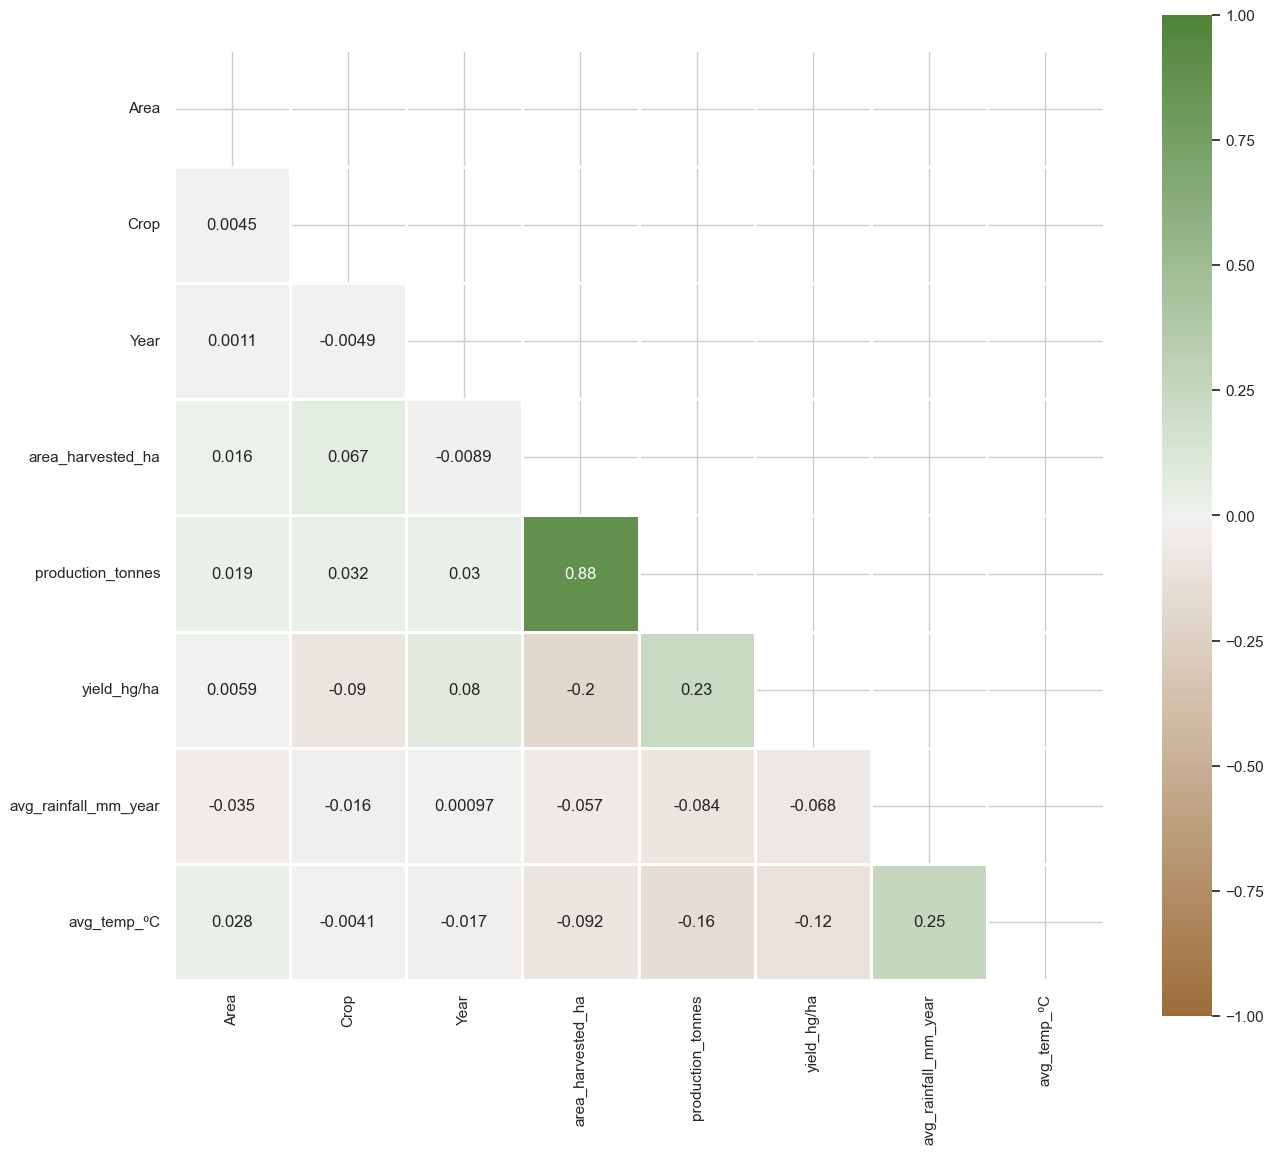

In [335]:
# Spearman's method 
corr = df_corr.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) 
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(45, 120, s=75, l=50, center="light", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask[0:9,0:9], cmap=cmap, vmax=1, center=0, vmin=-1,  
            square=True, linewidths=1, cbar_kws={"shrink": 1}, annot = True)      

<Axes: xlabel='Year'>

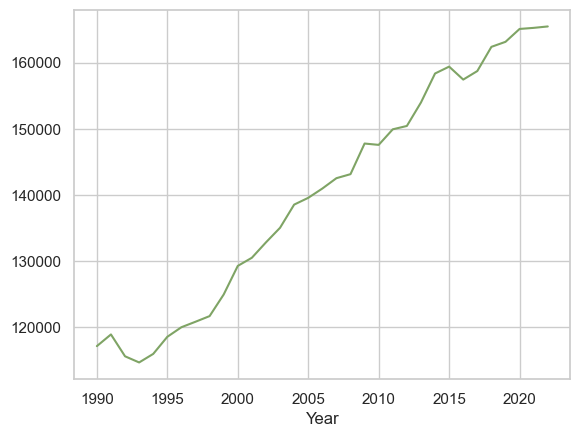

In [336]:
df.groupby('Year')['yield_hg/ha'].mean().plot(color=agro[2]) # Groups the df by the year and calculates the average of the column 'yield_hg/ha' for each year.

### YIELD

In [337]:
max_yield = df['yield_hg/ha'].max()
df[df['yield_hg/ha']==max_yield]

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
98828,Oman,Cucumbers and gherkins,2010,36.0,31519.0,8755278.0,125.0,28.02


In [338]:
min_yield = df['yield_hg/ha'].min()
df[df['yield_hg/ha']==min_yield]

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
2098,Algeria,Other pulses n.e.c.,1997,79950.0,75.0,9.0,89.0,24.02


In [339]:
# Average yield for each crop over all years
crops_byyield = df.groupby('Crop')['yield_hg/ha'].mean().sort_values(ascending=True).reset_index()

In [340]:
top_20crops_byyield = crops_byyield.head(20)
top_20crops_byyield

,Crop,yield_hg/ha
0,"Coffee, green",7189.159102
1,Millet,12907.586117
2,"Beans, dry",12959.639040
3,Sunflower seed,14217.293094
4,Other pulses n.e.c.,14869.900774
5,"Seed cotton, unginned",15245.305311
6,Soya beans,16167.732542
7,"Groundnuts, excluding shelled",17211.447973
8,"Peas, dry",17370.083078
9,Unmanufactured tobacco,18111.039077


In [341]:
fig = px.bar(top_20crops_byyield, x='yield_hg/ha', y='Crop', color='yield_hg/ha', color_continuous_scale=agro)
fig.update_layout(height=500, width=1500, title_text="Top 20 crops by average yield (hg/ha)", title_x=0.5,xaxis_title='average yield (hg/ha)',yaxis_title = '',
                  coloraxis_colorbar_title='average yield (hg/ha)') 

fig.show()

### AREA HARVESTED

In [343]:
df.head()

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
0,Afghanistan,Wheat,1990,1570000.0,1650000.0,10510.0,327.0,14.38
1,Afghanistan,Wheat,1991,1690000.0,1726000.0,10213.0,327.0,14.38
2,Afghanistan,Wheat,1992,1600000.0,1650000.0,10313.0,327.0,14.38
3,Afghanistan,Wheat,1993,1900000.0,1940000.0,10211.0,327.0,14.38
4,Afghanistan,Wheat,1994,2000000.0,2050000.0,10250.0,327.0,14.38


In [342]:
max_area= df['area_harvested_ha'].max()
df[df['area_harvested_ha']==max_area]

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
58794,India,Rice,2022,46400000.0,196245700.0,42294.0,1083.0,25.14


In [344]:
min_area = df['area_harvested_ha'].min()
df[df['area_harvested_ha']==min_area]

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
2658,Algeria,Bananas,2006,1.0,11.00,110000.0,89.0,24.02
2659,Algeria,Bananas,2007,1.0,11.00,80882.0,89.0,24.02
3909,Antigua and Barbuda,Cabbages,2020,1.0,1.80,13846.0,1030.0,27.20
4111,Antigua and Barbuda,"Onions and shallots, dry (excluding dehydrated)",2021,1.0,5.05,83609.0,1030.0,27.20
4173,Antigua and Barbuda,Carrots and turnips,2017,1.0,11.42,127666.0,1030.0,27.20
...,...,...,...,...,...,...,...,...
125000,Switzerland,"Other fruits, n.e.c.",2018,1.0,24.38,366410.0,1537.0,7.24
125001,Switzerland,"Other fruits, n.e.c.",2019,1.0,25.65,256642.0,1537.0,7.24
125002,Switzerland,"Other fruits, n.e.c.",2020,1.0,25.14,251454.0,1537.0,7.24
125003,Switzerland,"Other fruits, n.e.c.",2021,1.0,25.05,258656.0,1537.0,7.24


In [345]:
# Average area harvested for each crop over all years
crops_byarea = df.groupby('Crop')['area_harvested_ha'].mean().sort_values(ascending=True).reset_index()

In [346]:
top_20crops_byarea= crops_byarea.head(20)
top_20crops_byarea

,Crop,area_harvested_ha
0,Strawberries,4955.946382
1,Pomelos and grapefruits,7377.171091
2,Carrots and turnips,9870.746227
3,Lemons and limes,10659.303497
4,Pineapples,11810.566469
5,Lettuce and chicory,12210.276834
6,Cantaloupes and other melons,12344.643925
7,Cauliflowers and broccoli,13392.281668
8,Green garlic,15210.045738
9,"Pumpkins, squash and gourds",16096.655118


In [347]:
fig = px.bar(top_20crops_byarea, x='area_harvested_ha', y='Crop', color='area_harvested_ha', color_continuous_scale=agro)
fig.update_layout(height=500, width=1500, title_text="Top 20 crops by average area (ha)", title_x=0.5,xaxis_title='average area (ha)',yaxis_title = '',
                  coloraxis_colorbar_title='average area (ha)')  

### PRODUCTION

In [348]:
df.head()

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
0,Afghanistan,Wheat,1990,1570000.0,1650000.0,10510.0,327.0,14.38
1,Afghanistan,Wheat,1991,1690000.0,1726000.0,10213.0,327.0,14.38
2,Afghanistan,Wheat,1992,1600000.0,1650000.0,10313.0,327.0,14.38
3,Afghanistan,Wheat,1993,1900000.0,1940000.0,10211.0,327.0,14.38
4,Afghanistan,Wheat,1994,2000000.0,2050000.0,10250.0,327.0,14.38


In [349]:
max_production= df['production_tonnes'].max()
df[df['production_tonnes']==max_production]

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
19448,Brazil,Sugar cane,2016,10223894.0,768594154.0,751763.0,1771.5,25.56


In [350]:
min_production = df['production_tonnes'].min()
df[df['production_tonnes']==min_production]

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
94010,New Caledonia,Other pulses n.e.c.,2021,6.0,0.06,107.0,1183.25,23.23


In [351]:
# Average production for each crop over all years
crops_byproduction = df.groupby('Crop')['production_tonnes'].mean().sort_values(ascending=True).reset_index()
top_20crops_byproduction= crops_byproduction.head(20)
top_20crops_byproduction

,Crop,production_tonnes
0,Other pulses n.e.c.,44254.479803
1,Unmanufactured tobacco,60760.492781
2,Strawberries,82289.232408
3,"Coffee, green",100103.163455
4,Pomelos and grapefruits,101333.097997
5,Plums and sloes,122745.281569
6,"Peas, dry",146370.930705
7,Lemons and limes,150054.586445
8,"Other beans, green",183863.403307
9,"Other fruits, n.e.c.",190425.514256


In [352]:
fig = px.bar(top_20crops_byproduction, x='production_tonnes', y='Crop', color='production_tonnes', color_continuous_scale=agro)
fig.update_layout(height=500, width=1500, title_text="Top 20 crops by production (tonnes)", title_x=0.5,xaxis_title='average production (tonnes)',yaxis_title = '',
                  coloraxis_colorbar_title='average production (tonnes)')  

### Area (Countries)

#### INTERACTIVE MAPS

In [132]:
# Interactive maps
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
import geopandas as gpd

In [292]:
map_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"

In [353]:
geo = gpd.read_file(map_url)

In [354]:
geo = geo[['SOVEREIGNT','geometry']].copy()
# change the name to the column 'name'
geo.columns = ['Area','geometry']

In [355]:
geo.isnull().sum() 

Area        0
geometry    0
dtype: int64

In [356]:
geo.shape

(177, 2)

In [357]:
# correction of country names
geo['Area'].replace('United States of America','United States', inplace=True)
geo['Area'].replace('Republic of the Congo','Congo', inplace=True)

In [358]:
# Average area harvested by Country over all years
country_byarea = df.groupby('Area')['area_harvested_ha'].mean().sort_values(ascending=True).reset_index()
# Average yield by Country over all years
country_byyield = df.groupby('Area')['yield_hg/ha'].mean().sort_values(ascending=True).reset_index()

In [359]:
#Creamos un nuevo df llamado geo_final con la información de geo y la columna del conteo de alojamientos, utilizando como común la columna de barrio
geo1 = pd.merge(geo, country_byarea[['Area', 'area_harvested_ha']], on='Area', how='inner') 
#Creamos un nuevo df llamado geo2 con la información de geo1 y la columna del precio medio por barrio, utilizando como común la columna de barrio
geo_final = pd.merge(geo1, country_byyield[['Area', 'yield_hg/ha']], on='Area', how='inner') 

In [360]:
geo_final.shape

(146, 4)

In [361]:
# Guardar el geo_final a un csv
geo_final.to_csv('geo_final.csv', index=False)

In [362]:
geo_final.head(2)

,Area,geometry,area_harvested_ha,yield_hg/ha
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",4384.816667,89509.260714
1,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",636112.731877,151055.647468


In [363]:
# Crear el mapa de Folium con la ubicación inicial especificada
m = folium.Map(location=[43.037332, -40.410610])

# 1- Mapa por colores con el conteo de anuncios por barrio
# Crear una instancia de folium.Choropleth
area = folium.Choropleth(geo_final, data=geo_final, fill_color = 'Greens',columns=['Area','area_harvested_ha'],key_on='feature.properties.Area',name='avg harvested area')

# Agregar la instancia de folium.Choropleth al mapa m
area.add_to(m)

# Definir el contenido del tooltip (lo que se muestra al poner el cursor encima)
tooltip_area = folium.GeoJsonTooltip(fields=['Area', 'area_harvested_ha'], #Lista de campos que se muestran en el tooltip
                                 aliases=['Country', 'avg harvested area (ha)'],
                                 labels=True,
                                 sticky=False) # Si el tooltip permanece visible aunque no esté el cursor encima

area.geojson.add_child(tooltip_area)

#-----------------------------------------

# 2- Mapa por colores con la media de precios por barrio
# Crear una instancia de folium.Choropleth
avg_yield = folium.Choropleth(geo_final, data=geo_final, fill_color = 'Greens',columns=['Area','yield_hg/ha'],key_on='feature.properties.Area',name='avg crop yield')

# Agregar la instancia de folium.Choropleth al mapa m
avg_yield.add_to(m)

# Definir el contenido del tooltip (lo que se muestra al poner el cursor encima)
tooltip_yield = folium.GeoJsonTooltip(fields=['Area', 'yield_hg/ha'], #Lista de campos que se muestran en el tooltip
                                 aliases=['Country', 'avg crop yield (hg/ha)'],
                                 labels=True,
                                 sticky=False) # Si el tooltip permanece visible aunque no esté el cursor encima

avg_yield.geojson.add_child(tooltip_yield)

#-----------------------------------------

# Añade un control de capas
folium.LayerControl().add_to(m) 

folium.LayerControl({'avg harvested area (ha)':area.layer_name,'avg crop yield (hg/ha)': avg_yield.layer_name}).add_to(m)
m